**Name:** \_\_\_\_\_

**EID:** \_\_\_\_\_

# CS5489 - Tutorial 1
## Text Document Classification with Naive Bayes

In this tutorial you will classify text documents using Naive Bayes classifers.  We will be working with the dataset called "20 Newsgroups", which is a collection of 20,000 newsgroup posts organized into 20 categories.

First we need to initialize Python.  Run the below cell.

In [1]:
# !pip install matplotlib
# !pip install scikit-learn
%matplotlib inline
import matplotlib_inline   # setup output image format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats, special
random.seed(100)

Next, put the file "20news-bydate_py3.pkz' into the same directory as this ipynb file. **Do not unzip the file.**

Next, we will extract 4 classes from the dataset.  Run the below cell.

In [2]:
# strip away headers/footers/quotes from the text
removeset = ('headers', 'footers', 'quotes')

# only use 4 categories
cats      = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# load the training and testing sets
newsgroups_train = datasets.fetch_20newsgroups(subset='train',
                           remove=removeset, categories=cats, data_home='./')
newsgroups_test  = datasets.fetch_20newsgroups(subset='test', 
                           remove=removeset, categories=cats, data_home='./')

Now, we check if we got all the data.  The training set should have 2034 documents, and the test set should have 1353 documents.

In [3]:
print("training set size:", len(newsgroups_train.data))
print("testing set size: ",  len(newsgroups_test.data))
print(newsgroups_train.target_names)

training set size: 2034
testing set size:  1353
['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


Count the number examples in each class.  `newsgroups_train.target` is an array of class values (0 through 3), and `newsgroups_train.target[i]` is the class of the i-th document.

In [4]:
print("class counts")
for i in [0, 1, 2, 3]:
    print("{:20s}: {}".format(newsgroups_train.target_names[i], sum(newsgroups_train.target == i)))

class counts
alt.atheism         : 480
comp.graphics       : 584
sci.space           : 593
talk.religion.misc  : 377


Now have a look at the documents.  `newsgroups_train.data` is a list of strings, and `newsgroups_train.data[i]` is the i-th document.

In [5]:
for i in [0, 1, 2 ,3]:
    print("--- document {} (class={}) ---".format(
        i, newsgroups_train.target_names[newsgroups_train.target[i]]))
    print(newsgroups_train.data[i])

--- document 0 (class=comp.graphics) ---
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
--- document 1 (class=talk.religion.misc) ---


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil 

**Tip:** while you do the tutorial, it is okay to make additional code cells in the file.  This will allow you to avoid re-running code (like training a classifier, then testing a classifier).

### Build document vectors
Create the vocabulary from the training data.  Then build the document vectors for the training and testing sets.  You can decide how many words you want in the vocabulary.

In [6]:
# pull out the document data and labels
traindata = newsgroups_train.data
trainY = newsgroups_train.target

testdata = newsgroups_test.data
testY  = newsgroups_test.target

In [7]:
### INSERT YOUR CODE HERE
VOCAB_SIZE = 10000
# setup the document vectorizer to make BoW
cntvect = feature_extraction.text.CountVectorizer(max_features=VOCAB_SIZE,
                                                     stop_words='english',
                                                     lowercase=True)
# create the vocabulary from the training data
cntvect.fit(traindata)

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,'english'
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


In [8]:
# build document vectors for the training and testing data
trainX = cntvect.transform(traindata)
testX  = cntvect.transform(testdata)

###  Bernoulli Naive Bayes 
Learn a Bernoulli Naive Bayes model from the training set.  What is the prediction accuracy on the test set?  Try different parameters (alpha, max_features, etc) to get the best performance.

In [9]:
### INSERT YOUR CODE HERE
ALPHA_BNB = 0.21
bmodel = naive_bayes.BernoulliNB(alpha=ALPHA_BNB)
bmodel.fit(trainX, trainY)
predY = bmodel.predict(testX)
# print("test accuracy: {:.2f}%".format(100*sum(predY == testY)/len(testY)))
acc = metrics.accuracy_score(testY, predY)
print("test accuracy (sklearn): {:.2f}%".format(100*acc))

test accuracy (sklearn): 68.00%


What are the most important (frequent) words for each category?  Run the below code.

Note: `model.feature_log_prob_[i]` will index the word log-probabilities for the i-th class

In [10]:
# get the word names
fnames = asarray(cntvect.get_feature_names_out())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(bmodel.feature_log_prob_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], bmodel.feature_log_prob_[i][t]))

class alt.atheism
    time      (-1.80256)
    does      (-1.60813)
    know      (-1.60813)
    god       (-1.58755)
    like      (-1.54763)
    say       (-1.52825)
    just      (-1.45429)
    think     (-1.39377)
    people    (-1.29786)
    don       (-1.18962)
class comp.graphics
    just      (-1.94925)
    don       (-1.91383)
    program   (-1.87963)
    need      (-1.85746)
    does      (-1.74359)
    use       (-1.73385)
    like      (-1.60665)
    know      (-1.50918)
    graphics  (-1.49382)
    thanks    (-1.47121)
class sci.space
    earth     (-1.90618)
    use       (-1.88376)
    time      (-1.76870)
    know      (-1.72994)
    think     (-1.72994)
    nasa      (-1.72994)
    don       (-1.69263)
    just      (-1.47170)
    like      (-1.41463)
    space     (-1.01895)
class talk.religion.misc
    say       (-1.65378)
    way       (-1.62646)
    like      (-1.61307)
    does      (-1.53632)
    know      (-1.48824)
    think     (-1.42019)
    god       (-1.377

### Multinomial Naive Bayes model
Now learn a multinomial Naive Bayes model using the TF-IDF representation for the documents.  Again try different parameter values to improve the test accuracy.

In [11]:
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
trainXtf = tf_trans.fit_transform(trainX)
testXtf = tf_trans.transform(testX)

In [12]:
### INSERT YOUR CODE HERE
ALPHA_MNB = 0.0001
mmodel_tf = naive_bayes.MultinomialNB(alpha=ALPHA_MNB)
mmodel_tf.fit(trainXtf, trainY)

,alpha,0.0001
,force_alpha,True
,fit_prior,True
,class_prior,None


In [13]:
predYtf = mmodel_tf.predict(testXtf)
acc_tf = metrics.accuracy_score(testY, predYtf)
print("test accuracy with tf-idf (sklearn): {:.2f}%".format(100*acc_tf))

test accuracy with tf-idf (sklearn): 77.53%


What are the most important features for Multinomial model? Run the below code.

In [14]:
# get the word names
fnames = asarray(cntvect.get_feature_names_out())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(mmodel_tf.feature_log_prob_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], mmodel_tf.feature_log_prob_[i][t]))

class alt.atheism
    objective (-5.72902)
    religion  (-5.63487)
    does      (-5.62366)
    say       (-5.52680)
    people    (-5.39128)
    think     (-5.38824)
    don       (-5.28442)
    deletion  (-5.27143)
    just      (-5.10780)
    god       (-5.05745)
class comp.graphics
    program   (-5.57812)
    hi        (-5.52569)
    does      (-5.47258)
    image     (-5.45374)
    looking   (-5.42529)
    know      (-5.37482)
    files     (-5.35680)
    file      (-5.32979)
    graphics  (-4.93822)
    thanks    (-4.91701)
class sci.space
    don       (-6.04931)
    launch    (-5.95480)
    moon      (-5.94193)
    think     (-5.92456)
    thanks    (-5.89603)
    orbit     (-5.88921)
    just      (-5.70200)
    nasa      (-5.63327)
    like      (-5.61347)
    space     (-4.82682)
class talk.religion.misc
    wrong     (-5.77128)
    think     (-5.75538)
    just      (-5.73477)
    objective (-5.72067)
    don       (-5.69632)
    people    (-5.62597)
    christian (-5.586

How do the most important words differ between the TF-IDF multinomial model and the Bernoulli model?

In [15]:
import numpy as np

def show_top_words(model, vectorizer, target_names, n=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    for class_idx, class_name in enumerate(target_names):
        topn = np.argsort(model.feature_log_prob_[class_idx])[-n:]
        print(f"\nClass: {class_name}")
        print("Top words:", ", ".join(feature_names[topn]))

In [16]:
show_top_words(bmodel, cntvect, newsgroups_train.target_names, n=10)


Class: alt.atheism
Top words: time, does, know, god, like, say, just, think, people, don

Class: comp.graphics
Top words: just, don, program, need, does, use, like, know, graphics, thanks

Class: sci.space
Top words: earth, use, time, know, think, nasa, don, just, like, space

Class: talk.religion.misc
Top words: say, way, like, does, know, think, god, don, just, people


In [17]:
show_top_words(mmodel_tf, cntvect, newsgroups_train.target_names, n=10)


Class: alt.atheism
Top words: objective, religion, does, say, people, think, don, deletion, just, god

Class: comp.graphics
Top words: program, hi, does, image, looking, know, files, file, graphics, thanks

Class: sci.space
Top words: don, launch, moon, think, thanks, orbit, just, nasa, like, space

Class: talk.religion.misc
Top words: wrong, think, just, objective, don, people, christian, christians, jesus, god


- **INSERT YOUR ANSWER HERE**
1. The Bernoulli Model: Compared to the tf-idf multinomial model, as shown in the outputs above, the most important words for the Bernoulli model are often common words that frequently appear in sentences in general, such as *say, people, think, know, does, just*, etc. This is in alignmnet with the definition of the Bernoulli model, which only considers whether a word appears, and as a result even frequent but low-information words can get high weights, even if they are not strongly topic-specific.
2. The TF-IDF Multinomial Model: From the outputs shown above we can notice the presence of topic-specific words, such as *launch, orbit, christian, jesus*, etc. This stems from the definiton of TF-IDF, which reduces the influence of common words (e.g., does, thinks, etc.) and emphasizes words that appear often within a class but are rare in other classes. As a result, the tf-idf multinomial model considers **discriminative keywords** more important.

Finally, look at a few of the misclassified documents. 

In [18]:
### INSERT YOUR CODE HERE ###
# Bernoulli: predY, testY; TF-IDF Multinomial: predYtf, testY
idx_bernoulli_misclassified = np.where(predY != testY)[0]
idx_tfidf_misclassified = np.where(predYtf != testY)[0]
# idx_bernoulli_misclassified
# idx_tfidf_misclassified

In [19]:
import random

# Bernoulli misclassified examples
print("===================Bernoulli===================")
idx_bernoulli = [1286, 1067, 578]
# for _ in range(3):
    # idx = random.choice(idx_bernoulli_misclassified)
for idx in idx_bernoulli:
    print(f"\nIndex: {idx}")
    print(f"True label: {newsgroups_test.target_names[testY[idx]]}")
    print(f"Predicted label: {newsgroups_test.target_names[predY[idx]]}")
    print(f"Content: {testdata[idx].strip()[:500]}")
# TF-IDF Multinomial misclassified examples
print("===================TF-IDF Multinomial===================")
idx_tfidf = [123, 1146, 506]
# for _ in range(3):
#     idx = random.choice(idx_tfidf_misclassified)
for idx in idx_tfidf:
    print(f"\nIndex: {idx}")
    print(f"True label: {newsgroups_test.target_names[testY[idx]]}")
    print(f"Predicted label: {newsgroups_test.target_names[predYtf[idx]]}")
    print(f"Content: {testdata[idx].strip()[:500]}")

===================Bernoulli===================

Index: 1286
True label: sci.space
Predicted label: alt.atheism
Content: Is English (American, Canadian, etc.) common law recognized as
legally binding under international law?  After all, we're talking about
something that by its very nature isn't limited to the territory of one
nation.

Index: 1067
True label: talk.religion.misc
Predicted label: comp.graphics
Content: To you, it shouldn't matter if you do evil things or good things.  It is
   all meaningless in the end anyway.  So go rob a bank.  Go tell someone
   you dislike that he is a dirty rotten slime bag.  What's restraining you?

Index: 578
True label: alt.atheism
Predicted label: comp.graphics
Content: Vell, this is perfectly normal behaviour Vor a Vogon, you know?
===================TF-IDF Multinomial===================

Index: 123
True label: alt.atheism
Predicted label: sci.space
Content: When they're not important, yes.  All scientists do.  Otherwise science would
never ge

Can you get any intuition or reason why they were misclassified?

- **INSERT YOUR ANSWER HERE**
1. For the Bernoulli model: From the 3 examples printed out above, we can see that if a document does not contain clear topic-specific keywords, the classifier can misclassify the document to other wrong classes, which is the result of being swinged by the existance of generic or cross-domain words. For example, for case 1286, there are words such as *law, territory, nation*, which are common across multiple categories and not unique to sci.space. Because the Bernoulli model only considers word presece rather than frequency, these high-frequency but low-information words can dominate the prediction and shift the prediction to alt.atheism. Similar issues appear in index 1067 and 578, where the absence of strong religious or atheism related keywords causes the model to rely heavily on background vocabs, leading to misclassifitions.
2. For the TF-IDF Multinomial model: From the 3 examples printed out above, we can see that when a document contains topic-specific keywords that are more commonly associated with another class, the model is prone to misclassification. For example, in case 123, although the document is labeled with alt.atheism, it includes terms like *scientists*, which tf-idf heavily weights and associates with sci.space. Because the model emphasizes rare but class-specific words, these appearances make the model prefer the science-related class sci.space over the philosophical contexts of alt.atheism. 

### Effect of smoothing
The smoothing (regularization) parameter has a big effect on the performance.  Using the Multinomial TF-IDF models, make a plot of accuracy versus different values of alpha. For each alpha, you need to train a new model. Which alpha value yields the best result?

In [20]:
### INSERT YOUR CODE HERE
alphas = np.r_[0.0, np.logspace(-4, 1, 10000)]
accuracies = []

best_alpha_multinomial = None
best_accuracy = -1

for alpha in alphas:
    # print(alpha)
    try:
        assert alpha > 0
    except:
        alpha = 1e-10
    model = naive_bayes.MultinomialNB(alpha=alpha)
    model.fit(trainXtf, trainY)
    predY = model.predict(testXtf)
    acc = metrics.accuracy_score(testY, predY)
    accuracies.append(acc)
    if acc > best_accuracy:
        best_accuracy = acc
        best_alpha_multinomial = alpha

print(f"Best alpha: {best_alpha_multinomial: .6g}, Best accuracy: {best_accuracy: .4f}")

Best alpha:  0.0001, Best accuracy:  0.7753


In [21]:
### ADDITIONAL: alpha for bernoulli model
alphas = np.r_[0.0, np.logspace(-4, 1, 10000)]
accuracies = []
best_alpha_bernoulli = None
best_accuracy = -1
for alpha in alphas:
    # print(alpha)
    try:
        assert alpha > 0
    except:
        alpha = 1e-10
    model = naive_bayes.BernoulliNB(alpha=alpha)
    model.fit(trainX, trainY)
    predY = model.predict(testX)
    acc = metrics.accuracy_score(testY, predY)
    accuracies.append(acc)
    if acc > best_accuracy:
        best_accuracy = acc
        best_alpha_bernoulli = alpha

print(f"Best alpha (Bernoulli): {best_alpha_bernoulli: .6g}, Best accuracy: {best_accuracy: .4f}")

Best alpha (Bernoulli):  0.000126914, Best accuracy:  0.7332


### 5. Effect of vocabulary size
The vocabulary size also affects the accuracy.  Make another plot of accuracy versus vocabulary size.  Which vocabulary size yields the best result?

In [22]:
### INSERT YOUR CODE HERE
vocab_sizes = np.unique(np.logspace(2, 5, 100, dtype=int))
accuracies = []

best_vocab_size = None
best_accuracy = -1

for vocab_size in vocab_sizes:
    # print(vocab_size)
    cntvect = feature_extraction.text.CountVectorizer(max_features=vocab_size,
                                                     stop_words='english',
                                                     lowercase=True)
    cntvect.fit(traindata)
    trainX = cntvect.transform(traindata)
    testX  = cntvect.transform(testdata)

    model = naive_bayes.BernoulliNB(alpha=best_alpha_bernoulli)
    model.fit(trainX, trainY)
    predY = model.predict(testX)
    acc = metrics.accuracy_score(testY, predY)
    accuracies.append(acc)
    if acc > best_accuracy:
        best_accuracy = acc
        best_vocab_size = vocab_size

print(f"Best vocab size: {best_vocab_size: .6g}, Best accuracy: {best_accuracy: .4f}")


Best vocab size:  18738, Best accuracy:  0.7406


In [23]:
vocab_sizes = np.unique(np.logspace(2, 5, 100, dtype=int))
accuracies = []

best_vocab_size_multinomial = None
best_accuracy = -1

for vocab_size in vocab_sizes:
    tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
    cntvect = feature_extraction.text.CountVectorizer(max_features=vocab_size,
                                                     stop_words='english',
                                                     lowercase=True)
    cntvect.fit(traindata)
    trainX = cntvect.transform(traindata)
    testX  = cntvect.transform(testdata)
    trainXt = tf_trans.fit_transform(trainX)
    testXt  = tf_trans.transform(testX)

    model = naive_bayes.MultinomialNB(alpha=best_alpha_multinomial)
    model.fit(trainXt, trainY)
    predY = model.predict(testXt)
    acc = metrics.accuracy_score(testY, predY)
    accuracies.append(acc)
    if acc > best_accuracy:
        best_accuracy = acc
        best_vocab_size_multinomial = vocab_size
print(f"Best vocab size (Multinomial): {best_vocab_size_multinomial: .6g}, Best accuracy: {best_accuracy: .4f}")


Best vocab size (Multinomial):  20092, Best accuracy:  0.7820


## Poisson Naive Bayes

Now we will implement a Naive Bayes classifier using a Poisson distribution to model the count of each word appearing in the document.  Recall that the Poisson distribution is:
$$ \mathrm{Poisson}(x,\mu) = \frac{1}{x!}e^{-\mu} \mu^x$$
where $x \in \{0,1,2,\cdots\}$ is a counting number, and $\mu$ is the Poisson mean (arrival rate).

Here is some code showing how to compute the Poisson distribution using scipy.

[[ -1.          -2.          -3.5       ]
 [ -1.          -1.30685282  -2.24723703]
 [ -1.69314718  -1.30685282  -1.68762124]
 [ -2.79175947  -1.71231793  -1.53347056]
 [ -4.17805383  -2.40546511  -1.66700196]
 [ -5.78749174  -3.32175584  -2.0236769 ]
 [ -7.57925121  -4.42036813  -2.5626734 ]
 [ -9.52516136  -5.6731311   -3.25582058]
 [-11.6046029   -7.05942546  -4.08249915]
 [-13.80182748  -8.56350286  -5.02696076]
 [-16.10441257 -10.17294077  -6.07678289]
 [-18.50230785 -11.87768886  -7.22191519]
 [-20.9872145  -13.66944833  -8.45405887]
 [-23.55216385 -15.54125051  -9.76624526]
 [-26.19122118 -17.48716065 -11.15253962]
 [-28.89927138 -19.50206368 -12.60782686]
 [-31.67186011 -21.58150522 -14.12765261]
 [-34.50507345 -23.72157138 -15.70810299]
 [-37.39544521 -25.91879596 -17.34571178]
 [-40.33988419 -28.17008776 -19.03738779]]


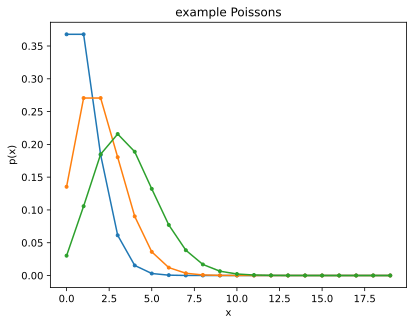

In [24]:
# Poisson distribution
from scipy.stats import poisson

# compute log Poisson(x, lambda)
px = poisson.logpmf(arange(0,20).reshape((20,1)), mu=[[1., 2., 3.5]])

# NOTE: the function respects broadcasting
# x is a column vector, and mu is a row vector
# in the output px, each column is the log Poisson values for one mu
print(px)

# make a plot
plt.title('example Poissons')
plt.plot(arange(0,20), exp(px), '.-');
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

Now let's see how to use the Poisson to create a Naive Bayes model. Let $x_i$ be the number of times the i-th word appears in the document. Then we model $x_i$ as a Poisson distribution for each class $c$,
  $$p(x_i|y=c) = \mathrm{Poisson}(x_i, \mu_{i,c})$$
where $\mu_{i, c}$ is the Poisson parameter for the i-th word in the c-th class.  Given the data $\{x_i^{(1)}, \cdots x_i^{(N)}\}$, corresponding the counts of the i-th word in the documents in the c-th class, $\mu_{i,c}$ is estimated as the mean of the data: $\mu_{i,c} = \frac{1}{N} \sum_{n=1}^N x_i^{(n)}$.

Finally, given the document $\mathbf{x} = [x_1,\cdots,x_D]$, the document class-conditional likelihood is:
  $$ p(\mathbf{x}|y=c) = \prod_{i=1}^D p(x_i|y=c) = \prod_{i=1}^D \mathrm{Poisson}(x_i, \mu_{i,c})$$
or CCD log-likelihood is
  $$ \log p(\mathbf{x}|y=c) = \sum_{i=1}^D \log \mathrm{Poisson}(x_i, \mu_{i,c})$$

Write a class for the Poisson Naive Bayes model.  Starting with the `GaussBayes` class from lecture as the template, you only need to change the estimation of the parameters $\mu_{i,c}$ and the computation of the log CCD.

In [31]:
### INSERT YOUR CODE HERE
from scipy.stats import poisson
from scipy.special import logsumexp

class PoissonNB:
    def __init__(self, alpha=0.0):
        self.alpha = alpha
    
    def fit(self, X, y):
        y = np.asarray(y)
        K = int(y.max()) + 1  
        self.K = K
        
        self.mu = []
        for c in range(K):
            Xc = X[y == c]
            self.mu.append(mean(Xc, axis=0))
        
        tmp = []
        for c in range(K):
            tmp.append(count_nonzero(y == c))
        self.pi = array(tmp) / len(y)
        
    def compute_logccd(self, X, c):
        px = poisson.logpmf(X.toarray(), mu=self.mu[c]).sum(axis=1)
        return px
    
    def compute_logjoint(self, X):
        jl = []
        for c in range(self.K):
            jl.append(self.compute_logccd(X, c) + log(self.pi[c]))
        p = stack(jl, axis=-1)
        return p
    
    def predic_logproba(self, X):
        lp = self.compute_logjoint(X)
        lpx = logsumexp(lp, axis=1)
        return lp - lpx[:, newaxis]
    
    def predict(self, X):
        lp = self.compute_logjoint(X)
        return argmax(lp, axis=1)

    
    

Now test your Poisson NB model on the Newsgroup dataset.

In [29]:
vocab_size = 10000
cntvect = feature_extraction.text.CountVectorizer(max_features=vocab_size,
                                                     stop_words='english',
                                                     lowercase=True)
cntvect.fit(traindata)
trainX = cntvect.transform(traindata)
testX  = cntvect.transform(testdata)

In [35]:
### INSERT YOUR CODE HERE
alphas = np.r_[0.0, np.logspace(-4, 1, 100)]
accuracies = []
best_alpha_poisson = None
best_accuracy = -1
for alpha in alphas:
    # print(alpha)
    try:
        assert alpha > 0
    except:
        alpha = 1e-10
    model = PoissonNB(alpha=alpha)
    model.fit(trainX, trainY)
    predY = model.predict(testX)
    acc = metrics.accuracy_score(testY, predY)
    accuracies.append(acc)
    if acc > best_accuracy:
        best_accuracy = acc
        best_alpha_poisson = alpha

print(f"Best alpha (Poisson): {best_alpha_poisson: .6g}, Best accuracy: {best_accuracy: .4f}")

Best alpha (Poisson):  1e-10, Best accuracy:  0.4678


In [36]:
vocab_sizes = np.unique(np.logspace(2, 5, 100, dtype=int))
accuracies = []

best_vocab_size_poisson = None
best_accuracy = -1

for vocab_size in vocab_sizes:
    model = PoissonNB(alpha=best_alpha_poisson)
    model.fit(trainX, trainY)
    predY = model.predict(testX)
    acc = metrics.accuracy_score(testY, predY)
    accuracies.append(acc)
    if acc > best_accuracy:
        best_accuracy = acc
        best_vocab_size_poisson = vocab_size
print(f"Best vocab size (Poisson): {best_vocab_size_poisson: .6g}, Best accuracy: {best_accuracy: .4f}")

Best vocab size (Poisson):  100, Best accuracy:  0.4678


How does the Poisson NB model compare with the other models that you tested?  Is this a good model for documents?

- **INSERT YOUR ANSWER HERE**
The Poisson Naive Bayes model achieves a best accuracy of 0.4678 from the experiments above, which is significant lower than the accuracy of Multinomial NB or that of Bernoulli NB. This shows that generally it's not a good model for document classification compared to algernatives that better capture the distribution of word counts.